In [1]:
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from matplotlib import pyplot

Using TensorFlow backend.


In [2]:
vgg16 = VGG16(weights='imagenet', include_top=False)
vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [3]:
#img_path = 'C:/Users/ustundag/Desktop/camera_81a9927c6b224f4bb5e6b9fbdcfae9c0_office_3_frame_25_domain_rgb.png'
img_path = 'cat-dog.png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

LAYER_NAME = 'block5_pool'
model = Model(vgg16.input, vgg16.get_layer(LAYER_NAME).output)
features = model.predict(x)
print(features.shape)

(1, 7, 7, 512)


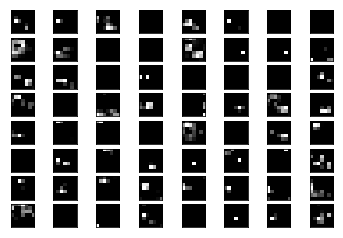

In [4]:
# plot the output from each block
square = 8
for fmap in features:
    # plot all 64 maps in an 8x8 squares
    ix = 1
    for _ in range(square):
        for _ in range(square):
            # specify subplot and turn of axis
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            pyplot.imshow(fmap[:, :, ix-1], cmap='gray')
            ix += 1
    # show the figure
    pyplot.show()

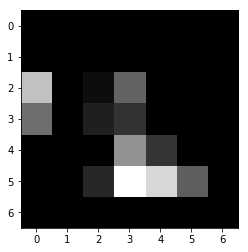

In [5]:
pyplot.imshow(fmap[:, :, 2], cmap='gray')
pyplot.show()

#### Links for Feature Visuaization

https://github.com/keras-team/keras/blob/master/examples/conv_filter_visualization.py

https://www.youtube.com/watch?v=N7-lyuhKoz8

https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

https://medium.com/@franky07724_57962/using-keras-pre-trained-models-for-feature-extraction-in-image-clustering-a142c6cdf5b1